In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/predict-sales-revenue')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Import Libraries
---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [3]:
advert = pd.read_csv('Advertising.csv')
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Remove the index column

In [5]:
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
advert.drop(['Unnamed: 0'], axis = 1, inplace = True)
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Exploratory Analysis

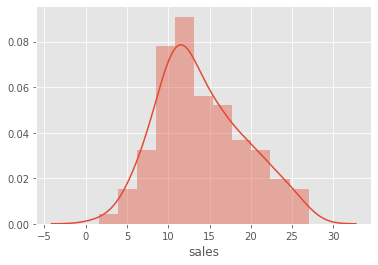

In [7]:
sns.distplot(advert.sales);

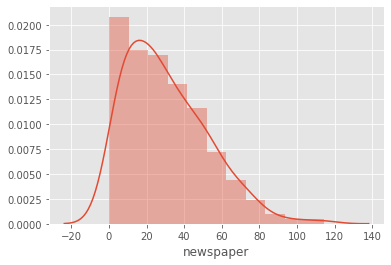

In [8]:
sns.distplot(advert.newspaper);

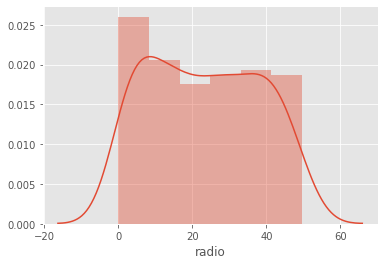

In [9]:
sns.distplot(advert.radio);

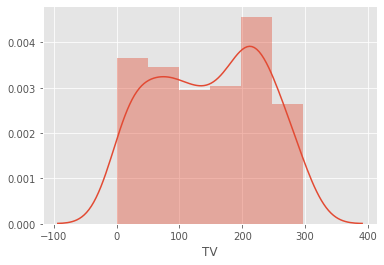

In [10]:
sns.distplot(advert.TV);

### Exploring Relationships between Predictors and Response

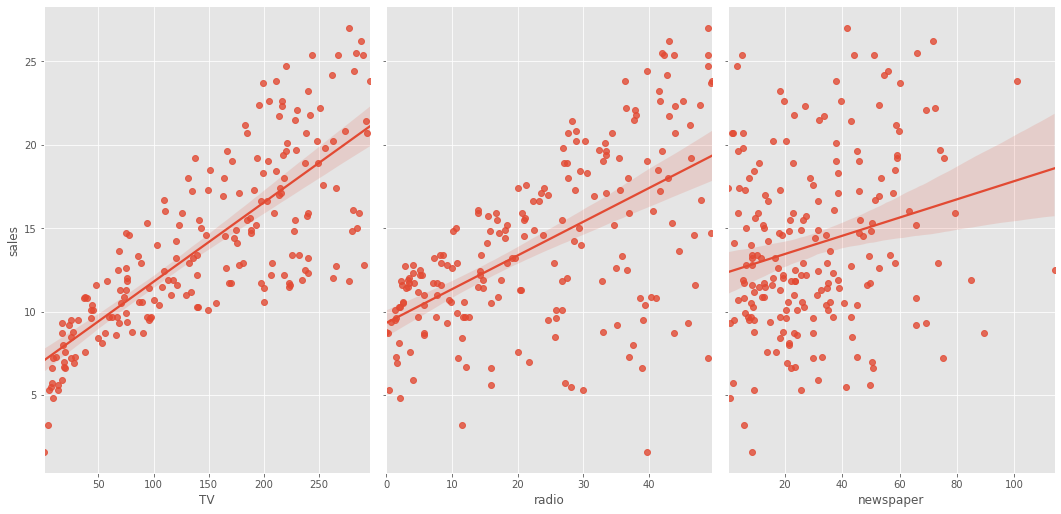

In [11]:
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg');

In [12]:
advert.TV.corr(advert.sales)

0.7822244248616061

In [13]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


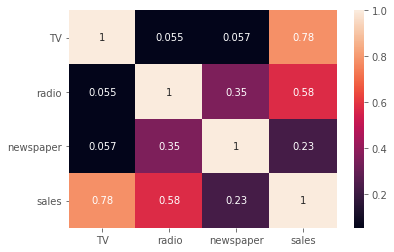

In [14]:
sns.heatmap( advert.corr(), annot=True );

### Creating the Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)
- $\beta_1$ is the feature coefficient and $y$ is the y-intercept

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [15]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = advert[feature_cols]
y = advert.sales

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [18]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Interpreting Model Coefficients

In [19]:
# print the intercept and coefficients
print(linreg.intercept_)
print(list(zip(feature_cols, linreg.coef_)))

2.87696662231793
[('TV', 0.046564567874150295), ('radio', 0.17915812245088839), ('newspaper', 0.0034504647111804343)]


### Making Predictions with our Model

In [20]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

### Task 9: Model Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

print("R^2: ", r2_score(y_test, y_pred))

RMSE:  1.404651423032895
R^2:  0.9156213613792232


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


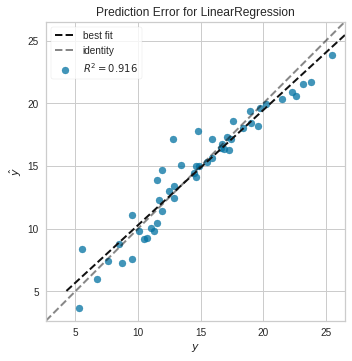

In [22]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(linreg)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

### Interaction Effect (Synergy)

In [23]:
advert['interaction'] = advert['TV'] * advert['radio']

In [24]:
X = advert[['TV', 'radio', 'interaction']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

linreg2 = LinearRegression()
linreg2.fit(X_train, y_train)
linreg2_preds = linreg2.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, linreg2_preds)))
print("R^2: ", r2_score(y_test, linreg2_preds))

RMSE : 0.7011871137164328
R^2:  0.978973681468126


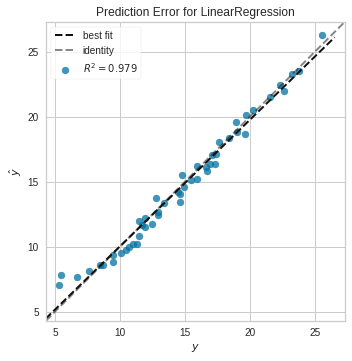

In [25]:
visualizer = PredictionError(linreg2)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 